## <의사결정 나무(Decision Tree)>

#### 1. 의사결정나무 개요 및 종류

&nbsp;&nbsp;&nbsp;&nbsp; **1)개요 :** 의사결정나무는 데이터의 특징을 기반으로 반복적인 분할 과정을 통해 해당 데이터를 분류 또는 예측하는 머신러닝 모델입니다. 머신러닝에서 자주 쓰이는 예시인 타이타닉호 생존자 문제를 예시로 들면, '성별이 어떻게 되나요?', 이어서 '사회적 계층이 어떻게 되나요?' 등으로 질문을 이어나가면서 그에 따라 데이터를 분할해가며 생존 여부를 예측할 수 있습니다. 그리고 이런식으로 처음 데이터를 기준으로 두 가지 갈래로, 그리고 또한 각 가지에서 또다시 두 가지 갈래로 데이터가 분류되어 가지가 뻗어나가기 때문에 '의사결정나무'라는 이름이 붙었습니다.

&nbsp;&nbsp;&nbsp;&nbsp; 타이타닉호 예시는 이진분류 문제이지만, 다중분류에도 활용할 수 있습니다. 또한 범주형뿐만 아니라 수치형에도 사용할 수 있습니다. 어느 경우든 다른 머신러닝 모델과 마찬가지로 예측 혹은 분류를 최적화하기 위한 데이터의 특징(feature)과 임게치를 찾는 것을 기본 목적으로 합니다.


#### 2. 주요 용어

&nbsp;&nbsp;&nbsp;&nbsp; **1)과적합과 가지치기 :** 질문을 적정한 수준에서 중단하지 않고 무수히 반복한다면, 다시 말해 가지를 무수히 많이 뻗어 나간다면 의사결정나무 모델에 '과적합' 문제가 생길 수 있습니다. 과적합은 모델이 처음 기반한 데이터를 과도하게 학습시킨 결과, 해당 데이터에 대해서만 효율적으로 작동하고 다른 데이터에 대해서는 효율적이지 못한 상황을 의미하는데요.
이러한 과적합을 방지하기 위해 보통 '가지치기(pruning)라는 기법을 사용합니다. 이는 가지가 뻗어나가기 위한 최소한의 데이터 수를 지정하는 것입니다. 가령 10개로 지정해주면, 특정 가지에 데이터가 10개 이하일 때 가지치기를 중단하게 됩니다.

&nbsp;&nbsp;&nbsp;&nbsp; **2)불순도와 엔트로피 :** 불순도는 특정 범주 안에 이질적인 데이터가 섞여 있는 정도를 말합니다. 그리고 엔트로피는 이를 수치적으로 나타낸 척도입니다.

&nbsp;&nbsp;&nbsp;&nbsp; **3)노드 :** 루프노드 - 의사결정 나무의 시작점, 리프노드 : 루트 노드에서 파생된 중간 혹은 최종 노드

&nbsp;&nbsp;&nbsp;&nbsp; **4)샘플 :** 해당 노드의 샘플 개수


#### 4. 장단점
&nbsp;&nbsp;&nbsp;&nbsp; **1)장점 :**

&nbsp;&nbsp;&nbsp;&nbsp; -화이트 박스 모델 사용 : 모델 자체가 직관적이기에 시각화를 통해 해석하기도 사용하기도 쉽고고 용이합니다.


&nbsp;&nbsp;&nbsp;&nbsp; -데이터 전처리에 크게 영향 안 받음 : 데이터를 특정 기준에 따라서 단순 분할하기만 하는 모델이기에, 이상치에 강하고 나아가 스케일링과 같은 전처리에 크게 신경쓰지 않아도 됩니다.

&nbsp;&nbsp;&nbsp;&nbsp; -분류와 회귀 모두에 사용할 수 있습니다.


&nbsp;&nbsp;&nbsp;&nbsp; **2)단점 :**

&nbsp;&nbsp;&nbsp;&nbsp; -과적합 : 과적합 문제가 발생할 수 있습니다.

&nbsp;&nbsp;&nbsp;&nbsp; -불안정성 : 비슷한 분류력을 가진 두 feature가 있을 때, 어느 것을 선택하느냐에 따라 데이터 수와 같은 약간의 차이로 완전히 다른 트리가 생성될 수 있습니다.


#### 5. 캐글 코드 분석 및 실습
&nbsp;&nbsp;&nbsp;&nbsp; 출처 : https://www.kaggle.com/code/mahnazarjmand/decision-tree-on-diabetes-data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.simplefilter(action = 'ignore')
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('C:/Users/neddy/Documents/GitHub/머신러닝학습/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### EDA

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### feature 별 상관관계 분석


<Axes: >

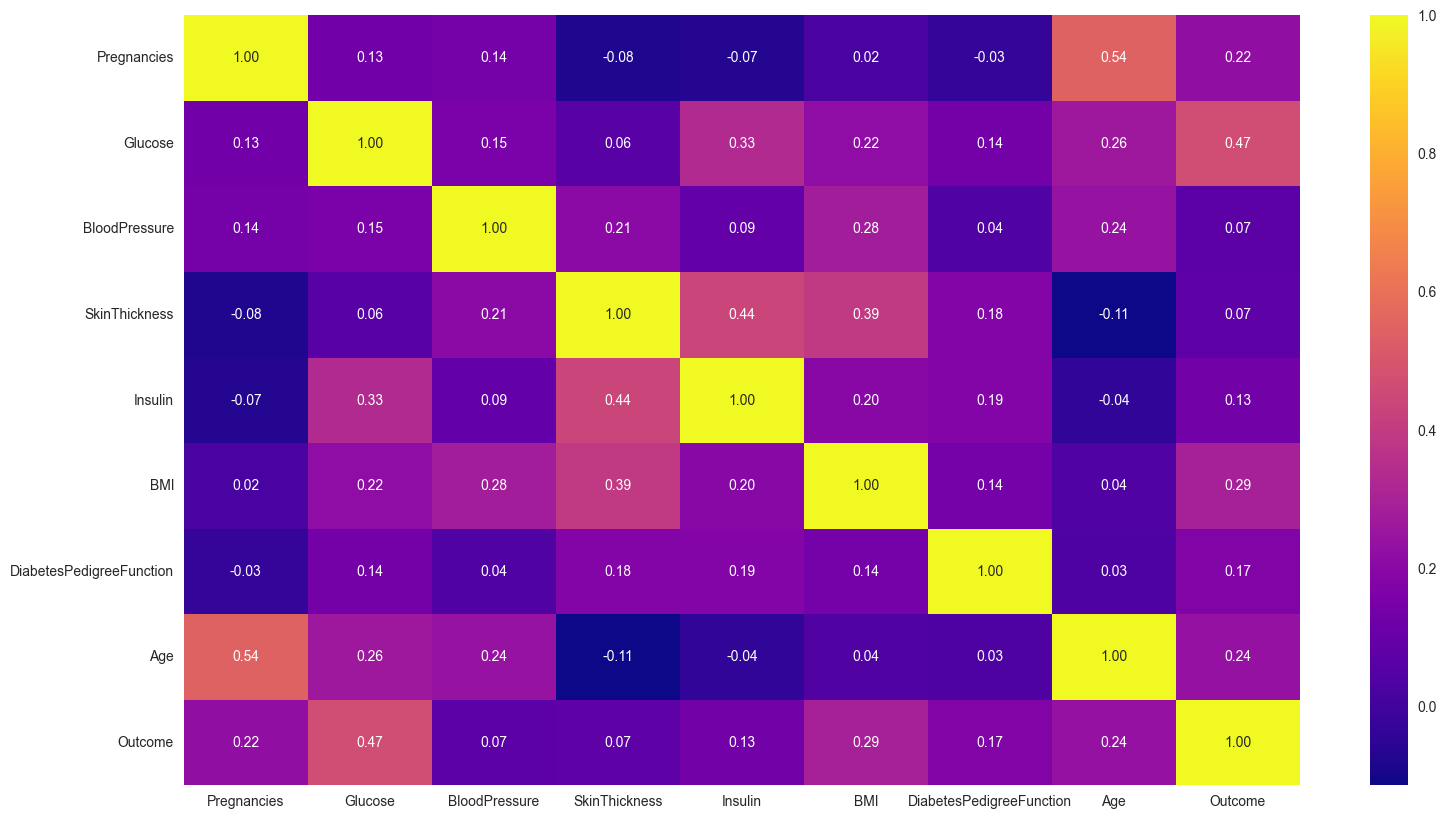

In [19]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

### 모델링

In [20]:
x = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=data.Outcome.values.reshape(-1,1)# Target variable

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [33]:
clf = DecisionTreeClassifier(max_depth = 5)   #사전 가지치기. 원문서에서 '3'이었으나 5가 더 결과 좋음
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [34]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7922077922077922


### 시각화

In [35]:
from sklearn import tree

In [37]:
text_rep = tree.export_text(clf)
print(text_rep)

|--- feature_0 <= 127.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 30.95
|   |   |   |--- feature_5 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.67
|   |   |   |   |--- feature_5 <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- feature_4 >  30.95
|   |   |   |--- feature_1 <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  37.00
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- feature_6 >  28.50
|   |   |--- feature_4 <= 26.35
|   |   |   |--- feature_4 <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  9.65
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  26.35
|   |   |   |--- feature_0 <= 94.50
|   |   |   |   |--- feature_0 <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  28.50
|   |   |   |   |

In [40]:
with open('decision_tree.log' ,'w') as fout:
    fout.write (text_rep)

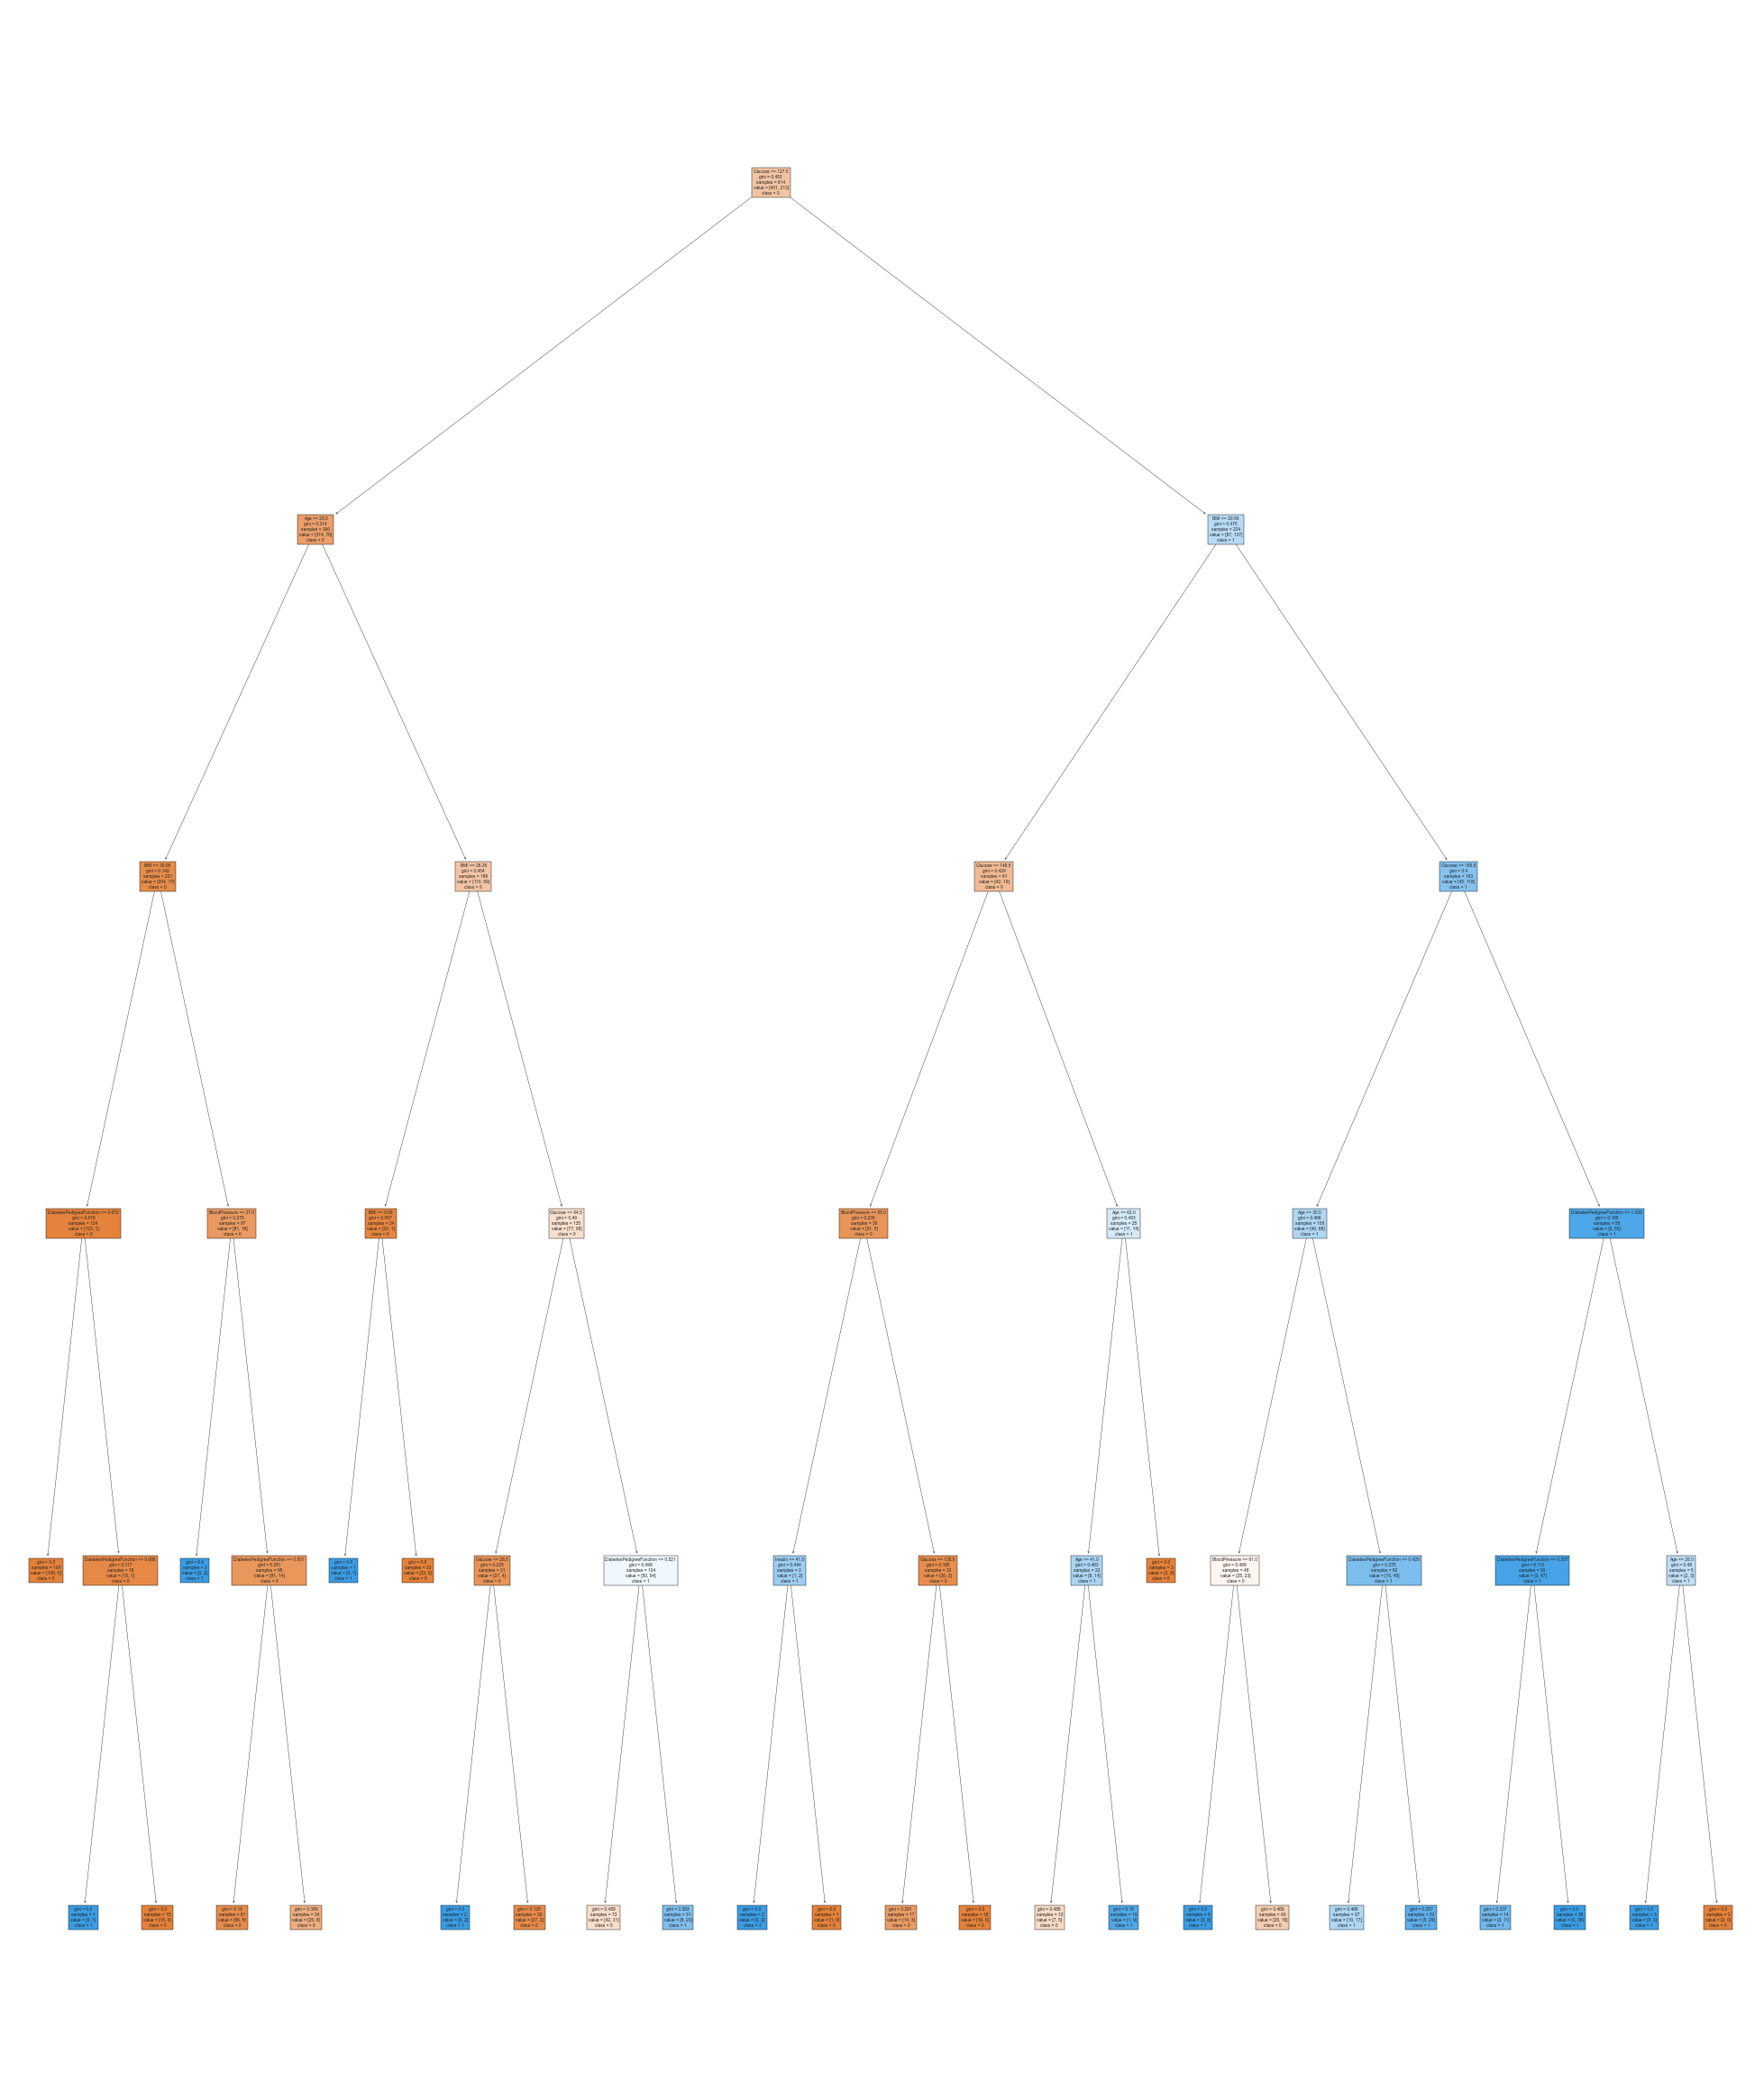

In [41]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree1.png')

### 엔트로피를 분류 기준으로 잡기

In [53]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 42)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
#원문에서는 유의미한 차이가 있었으나 여기서는 그닥 없음.

In [52]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7337662337662337


참고 자료 : 
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree
https://easyselfstudy.tistory.com/57